In [112]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import roc_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

#
from sklearn.feature_selection import RFE

In [113]:
# Ler DB

df_certo = pd.read_csv("../app/database/breast-cancer-certo.csv")

df_certo.head(n=5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
# Copiar
df_copy = df_certo

In [115]:
# Transformar dados categóricos em valores
map = {"M" : 0, "B" : 1}

df_copy["diagnosis"] = df_copy["diagnosis"].map(map)

df_copy.head(n=5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
# Dropar id
df_copy = df_copy.drop(["id"], axis=1)

df_copy.head(n=5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
# Definir o target e a data

x = df_copy.drop(["diagnosis"], axis=1) #data
y = df_copy["diagnosis"] #target

In [118]:
# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [119]:
# Separando os dataframes em teste e treino
from sklearn.model_selection import train_test_split

random_state = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=random_state)

print(len(x_treino))
print(len(x_teste))

398
171


In [120]:
# Import verificação dos dados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [121]:
# Graficos
from sklearn.metrics import confusion_matrix

In [122]:
# Configurar as variveis
estimator = 30
learning = 0.03

In [123]:
#RFE
n_cols = 12

# Adaboost

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
ada = AdaBoostClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

ada_boost = RFE(estimator=ada, n_features_to_select=n_cols)

model = ada_boost.fit(x_treino, y_treino)

ada_predict = model.predict(x_teste)

ada_predict_prob = ada_boost.predict_proba(x_teste)

## Gráficos

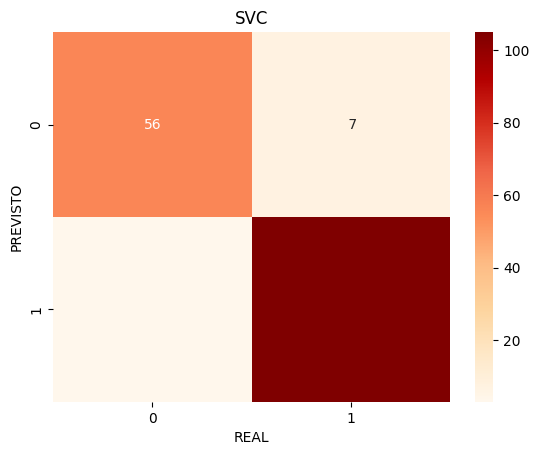

In [126]:
sns.heatmap(confusion_matrix(y_teste, ada_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

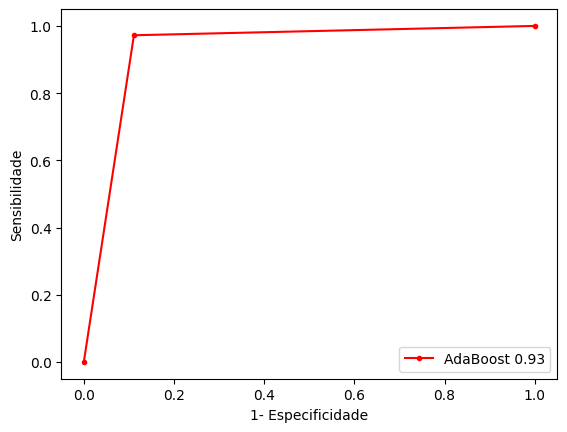

In [127]:
ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_predict)
ada_curva_roc = roc_auc_score(y_teste,ada_predict)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost "+str(round(ada_curva_roc, 2)), color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

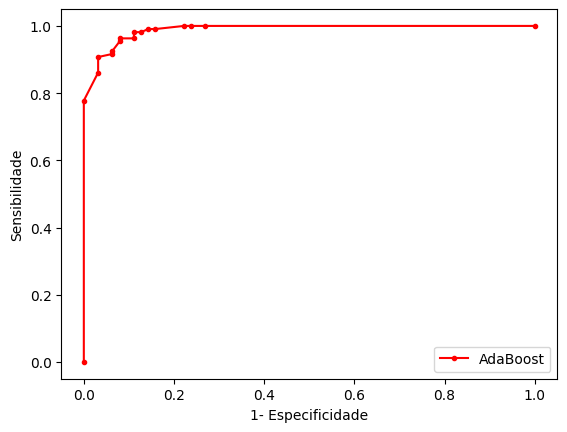

In [128]:
ada_probs = ada_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probs)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost", color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [129]:
acuracia = accuracy_score(y_teste,ada_predict)
precisao = precision_score(y_teste,ada_predict)
recall = recall_score(y_teste,ada_predict)
f1Score = f1_score(y_teste,ada_predict)
kappa = cohen_kappa_score(y_teste,ada_predict)

print('------ Adaboost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ Adaboost ---------

Acurácia: 0.9415204678362573
Precisão: 0.9375
Recall ou Sensibilidade: 0.9722222222222222
F1-Score: 0.9545454545454546
Kappa: 0.8726541554959786


## GridSearchCV

In [160]:
parameters = {
    'n_features_to_select': [1, 2, 3],
    'importance_getter': ['auto']
}

In [161]:
# aplicação do grid serach
grid_search = GridSearchCV(ada_boost, parameters, cv=5)
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=5,
             estimator=RFE(estimator=AdaBoostClassifier(learning_rate=0.03,
                                                        n_estimators=30,
                                                        random_state=42),
                           n_features_to_select=12),
             param_grid={'importance_getter': ['auto'],
                         'n_features_to_select': [1, 2, 3]})

In [162]:
best_params = grid_search.best_params_
print("Melhores parametros: ", best_params)

Melhores parametros:  {'importance_getter': 'auto', 'n_features_to_select': 2}


In [163]:
adaboost_best_param = grid_search.best_estimator_
y_predAda = adaboost_best_param.predict(x_teste)

In [164]:
acuracia = accuracy_score(y_teste,y_predAda)
precisao = precision_score(y_teste,y_predAda)
recall = recall_score(y_teste,y_predAda)
f1Score = f1_score(y_teste,y_predAda)
kappa = cohen_kappa_score(y_teste,y_predAda)

print('------ Adaboost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ Adaboost ---------

Acurácia: 0.935672514619883
Precisão: 0.944954128440367
Recall ou Sensibilidade: 0.9537037037037037
F1-Score: 0.9493087557603688
Kappa: 0.8613138686131387


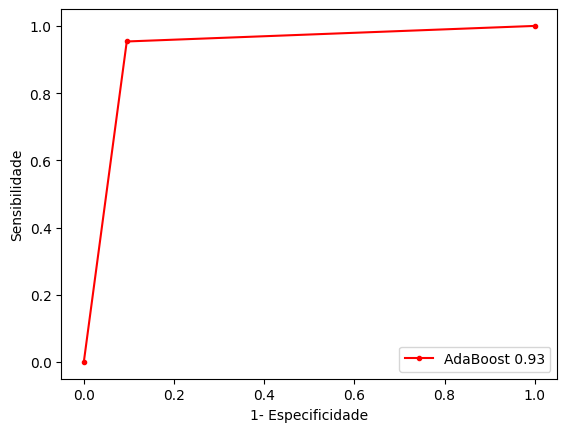

In [165]:
ada_fpG, ada_vpG, lim1G = roc_curve(y_teste, y_predAda)
ada_curva_rocG = roc_auc_score(y_teste,y_predAda)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost "+str(round(ada_curva_rocG, 2)), color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

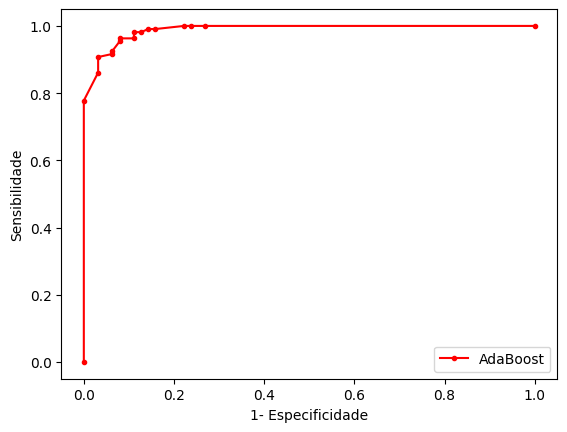

In [47]:
ada_probsG = grid_search.predict_proba(x_teste)[:,1]

ada_fpG, ada_vpG, lim1G = roc_curve(y_teste, ada_probsG)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost", color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# GBM

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbm_c = GradientBoostingClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

gbm = RFE(estimator=gbm_c, n_features_to_select=n_cols)

model = gbm.fit(x_treino, y_treino)

gbm_predict = model.predict(x_teste)

gbm_predict_prob = gbm.predict_proba(x_teste)

## Gráficos

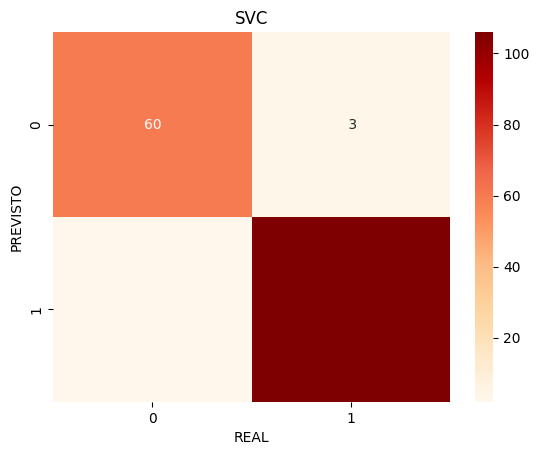

In [51]:
sns.heatmap(confusion_matrix(y_teste, gbm_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

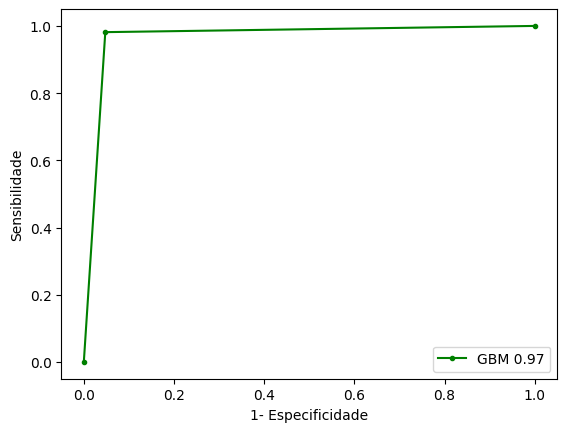

In [52]:
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_predict)
gbm_curva_roc = roc_auc_score(y_teste,gbm_predict)

plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM "+str(round(gbm_curva_roc, 2)), color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

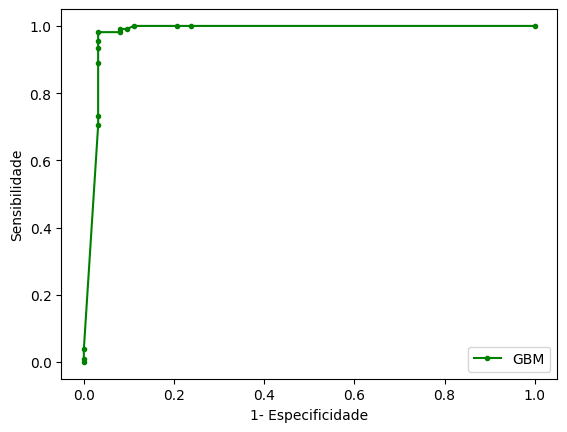

In [53]:
gbm_probs = gbm_predict_prob[:,1]

gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probs)

plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM", color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [55]:
acuracia = accuracy_score(y_teste,gbm_predict)
precisao = precision_score(y_teste,gbm_predict)
recall = recall_score(y_teste,gbm_predict)
f1Score = f1_score(y_teste,gbm_predict)
kappa = cohen_kappa_score(y_teste,gbm_predict)

print('------ GDM ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ GDM ---------

Acurácia: 0.9707602339181286
Precisão: 0.9724770642201835
Recall ou Sensibilidade: 0.9814814814814815
F1-Score: 0.9769585253456222
Kappa: 0.9369608493696084


## GridSearchCV

In [166]:
parameters = {
    'n_features_to_select': [1, 2, 3],
    'importance_getter': ['auto']
}

In [167]:
grid_search = GridSearchCV(gbm, parameters, cv=5)
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=5,
             estimator=RFE(estimator=GradientBoostingClassifier(learning_rate=0.03,
                                                                n_estimators=30,
                                                                random_state=42),
                           n_features_to_select=12),
             param_grid={'importance_getter': ['auto'],
                         'n_features_to_select': [1, 2, 3]})

In [168]:
best_params = grid_search.best_params_
print("Melhores parametros: ", best_params)

Melhores parametros:  {'importance_getter': 'auto', 'n_features_to_select': 3}


In [169]:
gbm_best = grid_search.best_estimator_
y_pred_gbm = gbm_best.predict(x_teste)

In [170]:
acuracia = accuracy_score(y_teste,y_pred_gbm)
precisao = precision_score(y_teste,y_pred_gbm)
recall = recall_score(y_teste,y_pred_gbm)
f1Score = f1_score(y_teste,y_pred_gbm)
kappa = cohen_kappa_score(y_teste,y_pred_gbm)

print('---------- GBM ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

---------- GBM ---------

Acurácia: 0.9590643274853801
Precisão: 0.954954954954955
Recall ou Sensibilidade: 0.9814814814814815
F1-Score: 0.9680365296803655
Kappa: 0.9111556446225785


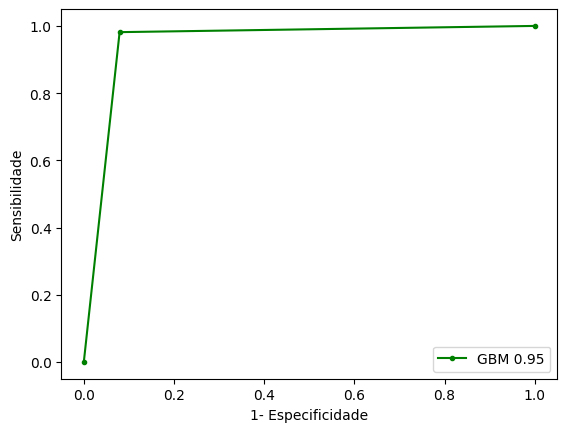

In [171]:
gbm_fpG, gbm_vpG, lim2G = roc_curve(y_teste, y_pred_gbm)
gbm_curva_rocG = roc_auc_score(y_teste,y_pred_gbm)

plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM "+str(round(gbm_curva_rocG, 2)), color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

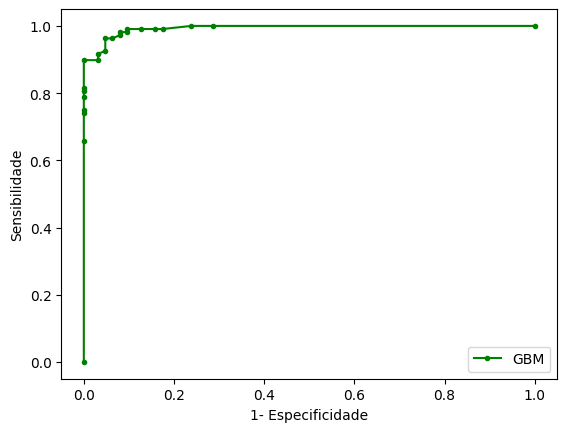

In [172]:
gbm_probsG = grid_search.predict_proba(x_teste)[:,1]

gbm_fpG, gbm_vpG, lim2G = roc_curve(y_teste, gbm_probsG)

plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM", color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_c = RandomForestClassifier(n_estimators=estimator, random_state=random_state)

rf = RFE(estimator=rf_c, n_features_to_select=n_cols)

model = rf.fit(x_treino, y_treino)

rf_predict = model.predict(x_teste)

rf_predict_prob = rf.predict_proba(x_teste)

## Gráficos

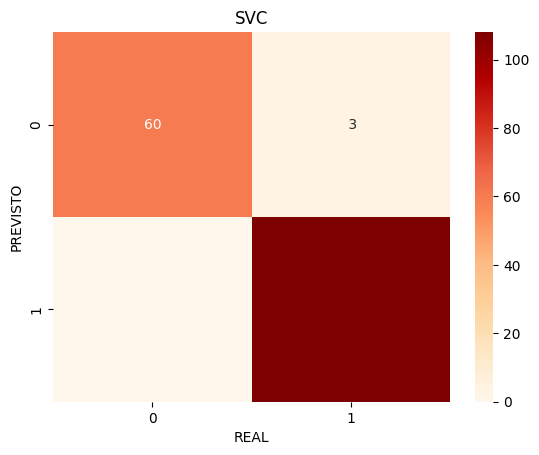

In [66]:
sns.heatmap(confusion_matrix(y_teste, rf_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

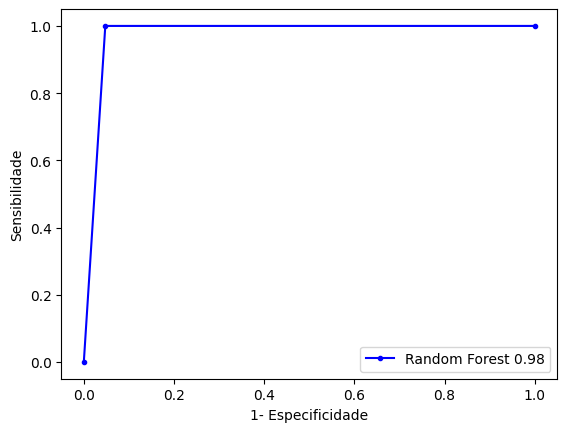

In [67]:
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_predict)
rf_curva_roc = roc_auc_score(y_teste,rf_predict)

plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest "+str(round(rf_curva_roc, 2)), color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

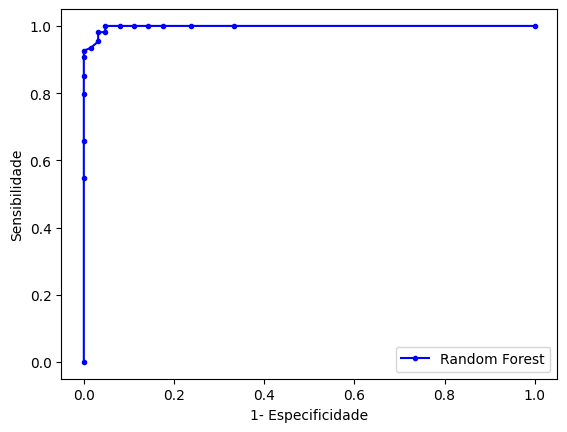

In [68]:
rf_probs = rf_predict_prob[:,1]

rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probs)

plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest", color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [69]:
acuracia = accuracy_score(y_teste,rf_predict)
precisao = precision_score(y_teste,rf_predict)
recall = recall_score(y_teste,rf_predict)
f1Score = f1_score(y_teste,rf_predict)
kappa = cohen_kappa_score(y_teste,rf_predict)

print('------ Random Forest ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ Random Forest ---------

Acurácia: 0.9824561403508771
Precisão: 0.972972972972973
Recall ou Sensibilidade: 1.0
F1-Score: 0.9863013698630138
Kappa: 0.9619238476953907


## GridSearchCV

In [174]:
parameters = {
    'n_features_to_select': [1, 2, 3],
    'importance_getter': ['auto']
}

y_train_1d = y_treino.ravel()

In [175]:
grid_search = GridSearchCV(rf, parameters, cv=5, error_score='raise')
grid_search.fit(x_treino, y_train_1d)

GridSearchCV(cv=5, error_score='raise',
             estimator=RFE(estimator=RandomForestClassifier(n_estimators=30,
                                                            random_state=42),
                           n_features_to_select=12),
             param_grid={'importance_getter': ['auto'],
                         'n_features_to_select': [1, 2, 3]})

In [176]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'importance_getter': 'auto', 'n_features_to_select': 3}


In [177]:
rf_best = grid_search.best_estimator_
y_pred_rf = rf_best.predict(x_teste)

In [178]:
acuracia = accuracy_score(y_teste,y_pred_rf)
precisao = precision_score(y_teste,y_pred_rf)
recall = recall_score(y_teste,y_pred_rf)
f1Score = f1_score(y_teste,y_pred_rf)
kappa = cohen_kappa_score(y_teste,y_pred_rf)

print('---------- RandomForest ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

---------- RandomForest ---------

Acurácia: 0.9415204678362573
Precisão: 0.9454545454545454
Recall ou Sensibilidade: 0.9629629629629629
F1-Score: 0.9541284403669724
Kappa: 0.8735019973368842


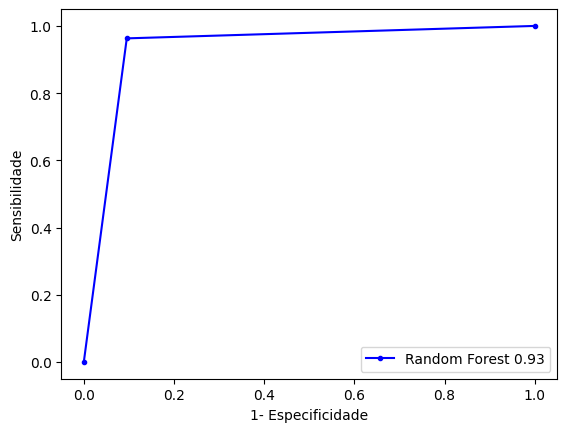

In [179]:
rf_fpG, rf_vpG, lim3G = roc_curve(y_teste, y_pred_rf)
rf_curva_rocG = roc_auc_score(y_teste,y_pred_rf)

plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest "+str(round(rf_curva_rocG, 2)), color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

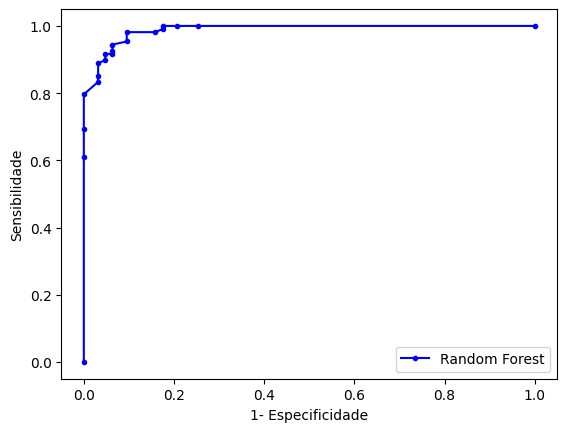

In [180]:
rf_probsG = grid_search.predict_proba(x_teste)[:,1]

rf_fpG, rf_vpG, lim3G = roc_curve(y_teste, rf_probsG)

plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest", color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# CatBoost

In [98]:
from catboost import CatBoostClassifier

In [99]:
cat_c = CatBoostClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

cat = RFE(estimator=cat_c, n_features_to_select=n_cols)

model = cat.fit(x_treino, y_treino)

cat_predict = model.predict(x_teste)

cat_predict_prob = cat.predict_proba(x_teste)

0:	learn: 0.6458382	total: 6.51ms	remaining: 189ms
1:	learn: 0.6040505	total: 15.8ms	remaining: 221ms
2:	learn: 0.5595114	total: 22.8ms	remaining: 205ms
3:	learn: 0.5247972	total: 31.5ms	remaining: 205ms
4:	learn: 0.4989183	total: 36.3ms	remaining: 181ms
5:	learn: 0.4676436	total: 44.8ms	remaining: 179ms
6:	learn: 0.4365765	total: 52.5ms	remaining: 172ms
7:	learn: 0.4082513	total: 62ms	remaining: 171ms
8:	learn: 0.3813392	total: 68.7ms	remaining: 160ms
9:	learn: 0.3589422	total: 74.4ms	remaining: 149ms
10:	learn: 0.3397529	total: 83.2ms	remaining: 144ms
11:	learn: 0.3242976	total: 88.3ms	remaining: 132ms
12:	learn: 0.3073592	total: 95.7ms	remaining: 125ms
13:	learn: 0.2923166	total: 101ms	remaining: 115ms
14:	learn: 0.2767856	total: 106ms	remaining: 106ms
15:	learn: 0.2629157	total: 115ms	remaining: 100ms
16:	learn: 0.2514883	total: 120ms	remaining: 92ms
17:	learn: 0.2395820	total: 127ms	remaining: 84.8ms
18:	learn: 0.2293391	total: 133ms	remaining: 76.8ms
19:	learn: 0.2181358	total: 1

## Gráficos

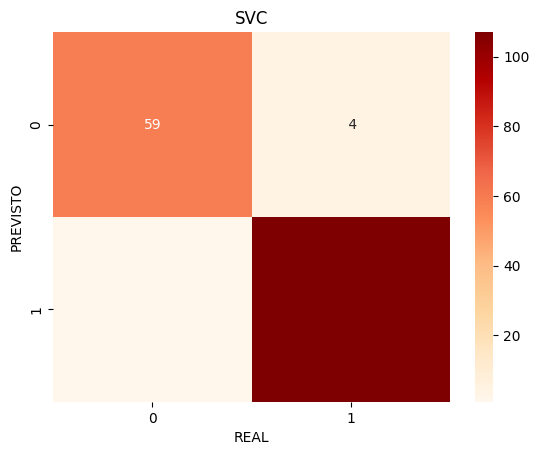

In [181]:
sns.heatmap(confusion_matrix(y_teste, cat_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

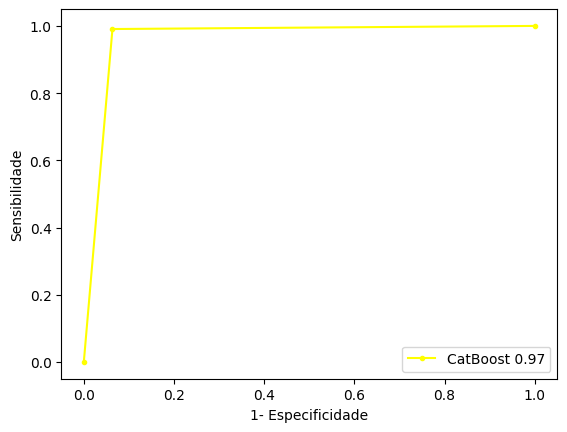

In [182]:
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_predict)
cat_curva_roc = roc_auc_score(y_teste,cat_predict)

plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost "+str(round(gbm_curva_roc, 2)), color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

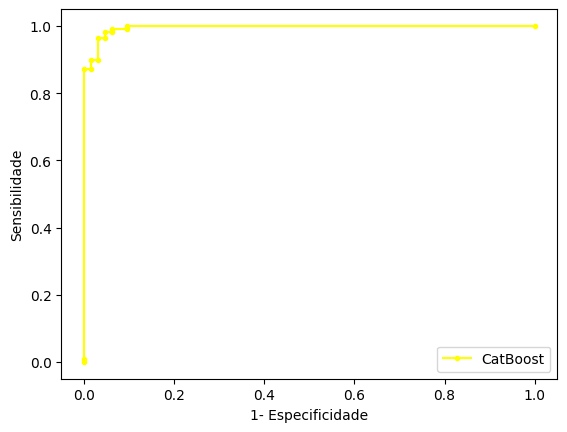

In [183]:
cat_probs = cat_predict_prob[:,1]

cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probs)

plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost", color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [82]:
acuracia = accuracy_score(y_teste,cat_predict)
precisao = precision_score(y_teste,cat_predict)
recall = recall_score(y_teste,cat_predict)
f1Score = f1_score(y_teste,cat_predict)
cat_curva_rocG = roc_auc_score(y_teste,cat_predict)
kappa = cohen_kappa_score(y_teste,cat_predict)

print('------ CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ CatBoost ---------

Acurácia: 0.9707602339181286
Precisão: 0.963963963963964
Recall ou Sensibilidade: 0.9907407407407407
F1-Score: 0.9771689497716894
Kappa: 0.9365397461589846


## GridSearchCV

In [184]:
parameters = {
    'n_features_to_select': [1, 2, 3],
    'importance_getter': ['auto']
}

In [185]:
grid_search = GridSearchCV(cat, parameters, cv=5)
grid_search.fit(x_treino, y_treino)

0:	learn: 0.6487634	total: 19.1ms	remaining: 554ms
1:	learn: 0.6131835	total: 32.1ms	remaining: 449ms
2:	learn: 0.5753675	total: 41.5ms	remaining: 374ms
3:	learn: 0.5427322	total: 54.1ms	remaining: 351ms
4:	learn: 0.5093092	total: 65.9ms	remaining: 329ms
5:	learn: 0.4774660	total: 84.6ms	remaining: 339ms
6:	learn: 0.4483971	total: 94ms	remaining: 309ms
7:	learn: 0.4204850	total: 103ms	remaining: 283ms
8:	learn: 0.3969154	total: 112ms	remaining: 261ms
9:	learn: 0.3724163	total: 124ms	remaining: 247ms
10:	learn: 0.3522806	total: 134ms	remaining: 231ms
11:	learn: 0.3378547	total: 144ms	remaining: 216ms
12:	learn: 0.3223495	total: 153ms	remaining: 200ms
13:	learn: 0.3050948	total: 159ms	remaining: 182ms
14:	learn: 0.2865968	total: 169ms	remaining: 169ms
15:	learn: 0.2712485	total: 177ms	remaining: 155ms
16:	learn: 0.2590500	total: 184ms	remaining: 141ms
17:	learn: 0.2461225	total: 190ms	remaining: 127ms
18:	learn: 0.2359329	total: 200ms	remaining: 116ms
19:	learn: 0.2287740	total: 206ms	re

GridSearchCV(cv=5,
             estimator=RFE(estimator=<catboost.core.CatBoostClassifier object at 0x7f84d02558d0>,
                           n_features_to_select=12),
             param_grid={'importance_getter': ['auto'],
                         'n_features_to_select': [1, 2, 3]})

In [186]:
best_params = grid_search.best_params_
print("Best params: ", best_params)

Best params:  {'importance_getter': 'auto', 'n_features_to_select': 3}


In [187]:
cat_best = grid_search.best_estimator_
y_pred_cat = cat_best.predict(x_teste)

In [188]:
acuracia = accuracy_score(y_teste,y_pred_cat)
precisao = precision_score(y_teste,y_pred_cat)
recall = recall_score(y_teste,y_pred_cat)
f1Score = f1_score(y_teste,y_pred_cat)
kappa = cohen_kappa_score(y_teste,y_pred_cat)

print('---------- CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

---------- CatBoost ---------

Acurácia: 0.9649122807017544
Precisão: 0.9722222222222222
Recall ou Sensibilidade: 0.9722222222222222
F1-Score: 0.9722222222222222
Kappa: 0.9246031746031746


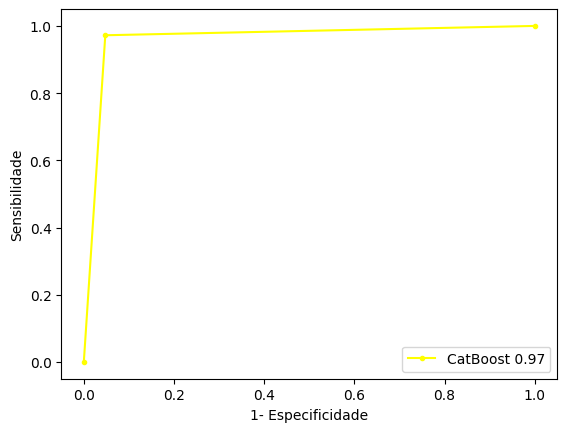

In [189]:
cat_fpG, cat_vpG, lim4G = roc_curve(y_teste, y_pred_cat)
cat_curva_rocG = roc_auc_score(y_teste,y_pred_cat)

plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost "+str(round(gbm_curva_roc, 2)), color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

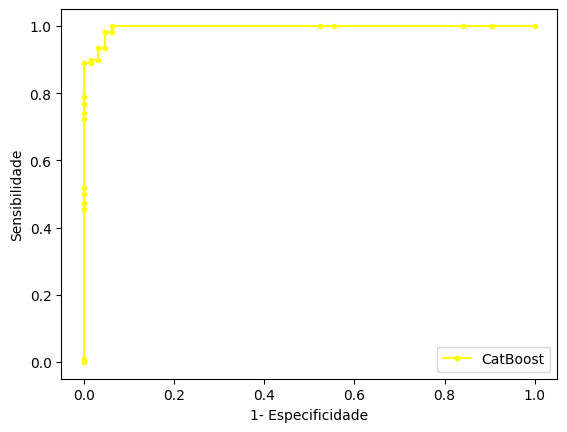

In [190]:
cat_probsG = grid_search.predict_proba(x_teste)[:,1]

cat_fpG, cat_vpG, lim4G = roc_curve(y_teste, cat_probsG)

plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost", color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# SVC

In [198]:
from sklearn.svm import SVC

In [199]:
svc_c = SVC(random_state=random_state, probability=True, kernel="linear", C=1)

svc = RFE(estimator=svc_c, n_features_to_select=n_cols)

model = svc.fit(x_treino, y_treino)

svc_predict = model.predict(x_teste)

svc_predict_prob = svc.predict_proba(x_teste)

## Gráficos

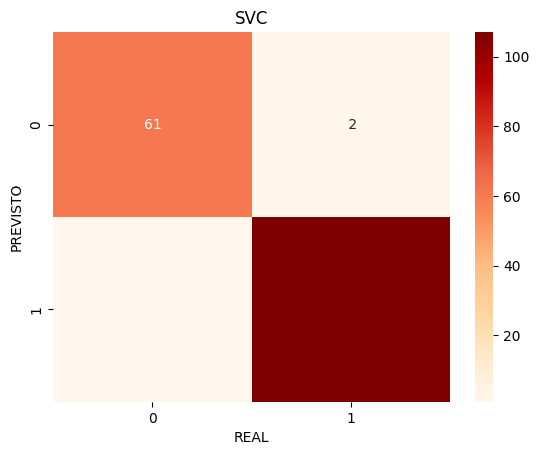

In [200]:
sns.heatmap(confusion_matrix(y_teste, svc_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

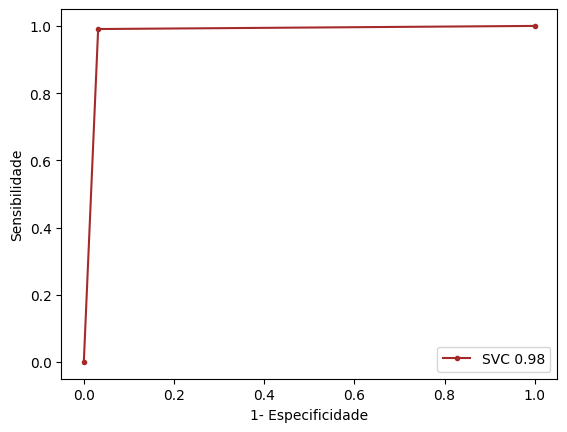

In [201]:
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_predict)
svc_curva_roc = roc_auc_score(y_teste,svc_predict)

plt.plot(svc_fp, svc_vp, marker=".", label="SVC "+str(round(svc_curva_roc, 2)), color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

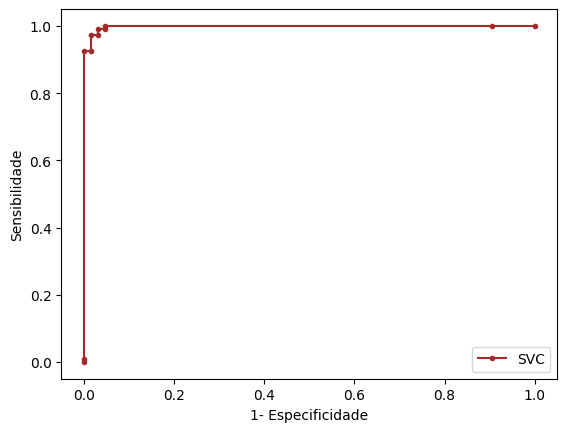

In [202]:
svc_probs = svc_predict_prob[:,1]

svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probs)

plt.plot(svc_fp, svc_vp, marker=".", label="SVC", color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [203]:
acuracia = accuracy_score(y_teste,svc_predict)
precisao = precision_score(y_teste,svc_predict)
recall = recall_score(y_teste,svc_predict)
f1Score = f1_score(y_teste,svc_predict)
svc_curva_rocG = roc_auc_score(y_teste,svc_predict)
kappa = cohen_kappa_score(y_teste,svc_predict)

print('------ CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ CatBoost ---------

Acurácia: 0.9824561403508771
Precisão: 0.981651376146789
Recall ou Sensibilidade: 0.9907407407407407
F1-Score: 0.9861751152073732
Kappa: 0.9621765096217652


## GridSearchCV

In [204]:
parameters = {
    'n_features_to_select': [1, 2, 3],
    'importance_getter': ['auto']
}

In [205]:
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=5,
             estimator=RFE(estimator=SVC(C=1, kernel='linear', probability=True,
                                         random_state=42),
                           n_features_to_select=12),
             param_grid={'importance_getter': ['auto'],
                         'n_features_to_select': [1, 2, 3]})

In [206]:
best_params = grid_search.best_params_
print("Melhores parametros: ", best_params)

Melhores parametros:  {'importance_getter': 'auto', 'n_features_to_select': 3}


In [207]:
svc_best = grid_search.best_estimator_
y_pred_svc = svc_best.predict(x_teste)

In [208]:
acuracia = accuracy_score(y_teste,y_pred_svc)
precisao = precision_score(y_teste,y_pred_svc)
recall = recall_score(y_teste,y_pred_svc)
f1Score = f1_score(y_teste,y_pred_svc)
kappa = cohen_kappa_score(y_teste,y_pred_svc)

print('--------- SVC ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

--------- SVC ---------

Acurácia: 0.9473684210526315
Precisão: 0.9459459459459459
Recall ou Sensibilidade: 0.9722222222222222
F1-Score: 0.9589041095890412
Kappa: 0.8857715430861723


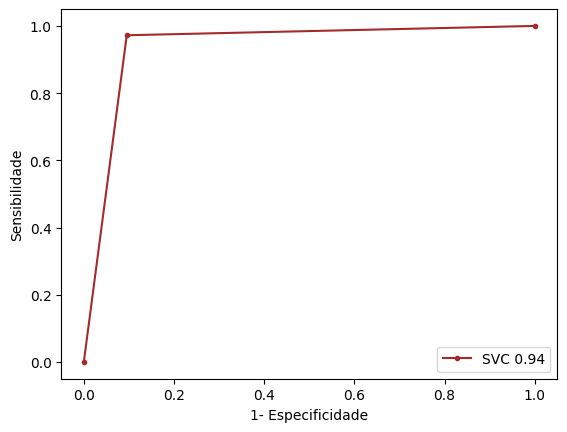

In [209]:
svc_fpG, svc_vpG, lim5G = roc_curve(y_teste, y_pred_svc)
svc_curva_rocG = roc_auc_score(y_teste,y_pred_svc)

plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC "+str(round(svc_curva_rocG, 2)), color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

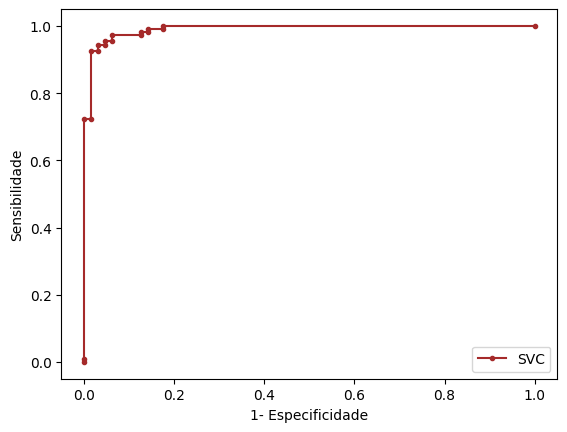

In [210]:
svc_probsG = grid_search.predict_proba(x_teste)[:,1]

svc_fpG, svc_vpG, lim5G = roc_curve(y_teste, svc_probsG)

plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC", color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# Resultado

## Normal

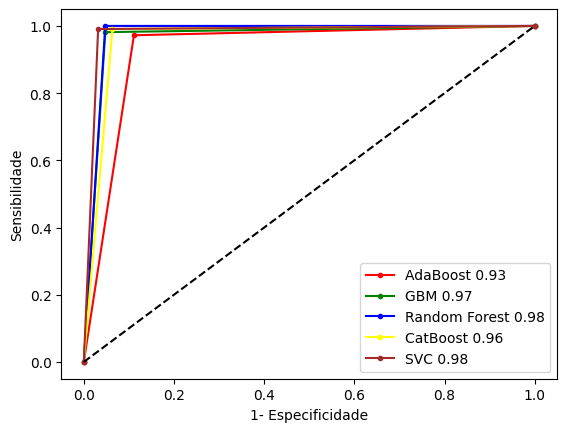

In [211]:
ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_predict)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_predict)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_predict)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_predict)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_predict)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost "+str(round(ada_curva_roc, 2)), color="red")
plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM "+str(round(gbm_curva_roc, 2)), color="green")
plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest "+str(round(rf_curva_roc, 2)), color="blue")
plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost "+str(round(cat_curva_roc, 2)), color="yellow")
plt.plot(svc_fp, svc_vp, marker=".", label="SVC "+str(round(svc_curva_roc, 2)), color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

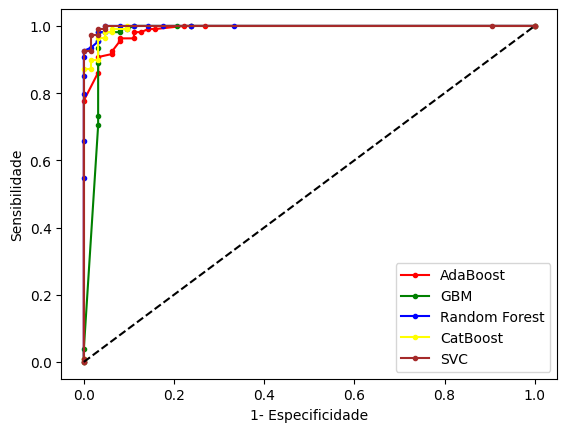

In [212]:
ada_probs = ada_predict_prob[:,1]
gbm_probs = gbm_predict_prob[:,1]
rf_probs = rf_predict_prob[:,1]
cat_probs = cat_predict_prob[:,1]
svc_probs = svc_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probs)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probs)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probs)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probs)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probs)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost", color="red")
plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM", color="green")
plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest", color="blue")
plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost", color="yellow")
plt.plot(svc_fp, svc_vp, marker=".", label="SVC", color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()


## Grid Search

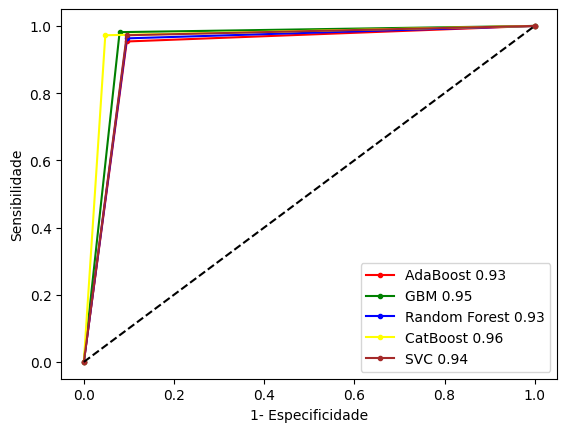

In [213]:
ada_fpG, ada_vpG, lim1G = roc_curve(y_teste, y_predAda)
gbm_fpG, gbm_vpG, lim2G = roc_curve(y_teste, y_pred_gbm)
rf_fpG, rf_vpG, lim3G = roc_curve(y_teste, y_pred_rf)
cat_fpG, cat_vpG, lim4G = roc_curve(y_teste, y_pred_cat)
svc_fpG, svc_vpG, lim5G = roc_curve(y_teste, y_pred_svc)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost "+str(round(ada_curva_rocG, 2)), color="red")
plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM "+str(round(gbm_curva_rocG, 2)), color="green")
plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest "+str(round(rf_curva_rocG, 2)), color="blue")
plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost "+str(round(cat_curva_rocG, 2)), color="yellow")
plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC "+str(round(svc_curva_rocG, 2)), color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

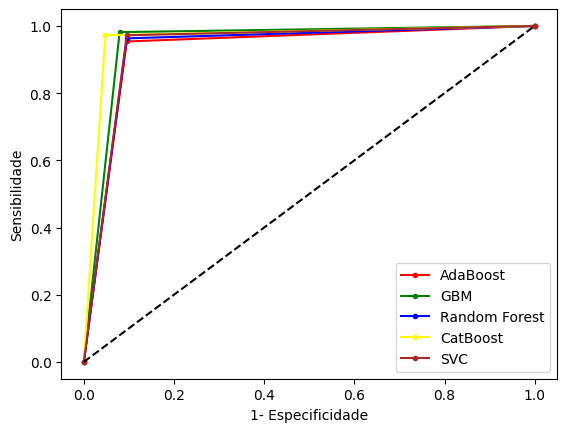

In [214]:
# ada_probs = ada_predict_prob[:,1]
# gbm_probs = gbm_predict_prob[:,1]
# rf_probs = rf_predict_prob[:,1]
# cat_probs = cat_predict_prob[:,1]
# svc_probs = svc_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probsG)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probsG)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probsG)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probsG)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probsG)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost", color="red")
plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM", color="green")
plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest", color="blue")
plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost", color="yellow")
plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC", color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()